# Example Questions

In [2]:
from assistant import ask_claims_mini_assistant
from IPython.display import Image, display

In [3]:
def print_image(response):
    if response.get("visualization_path") is not None and response.get("visualization_path") != "":
        display(Image(filename=response["visualization_path"]))
    else:
        print("No image available in the response.")

## Question 1: "Show me the trends in claims over time by month"
Default value in `ask_claims_mini_assistant` function

In [3]:
response = ask_claims_mini_assistant()

/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_descriptions'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'procedure_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init



> Entering new SQL Agent Executor chain...

Invoking: `sql_db_list_tables` with `{'tool_input': ''}`
responded: I need to start by understanding the database structure. I'll list the tables and then examine the schema of the ones that seem relevant to the user's question. This will help me formulate an accurate query.

mart_dim_diagnosis, mart_dim_patients, mart_dim_plans, mart_dim_procedures, mart_dim_providers, mart_fct_claim_diagnosis, mart_fct_claim_procedure, mart_fct_claim_providers, mart_fct_claims, raw_data_claim_providers, raw_data_claims, raw_data_patients, raw_data_providers, stg_claim_providers, stg_claims, stg_patients, stg_providers
Invoking: `get_schema_info` with `mart_fct_claims, mart_dim_patients`
responded: I need to investigate the available tables to answer the user's question about claim trends over time. The `mart_fct_claims` table seems like the most relevant source for claim data and dates. I will also check the `mart_dim_patients` table for any useful relate

### Answer

In [4]:
if response.get("error_info") is not None and response.get("error_info") != "":
    print(f"Error: {response['error_info']}")
else:
    print(f"Response: {response['natural_language_response']}")


Response: The number of claims has been relatively stable on a month-to-month basis, with minor fluctuations. The generated image shows the detailed trend.


### SQL Query

In [5]:
print(response["sql_query"])

SELECT
  STRFTIME(claim_submitted_date, '%Y-%m') AS month,
  COUNT(claim_id) AS number_of_claims
FROM raw_data_claims
GROUP BY
  month
ORDER BY
  month;


### Visualization

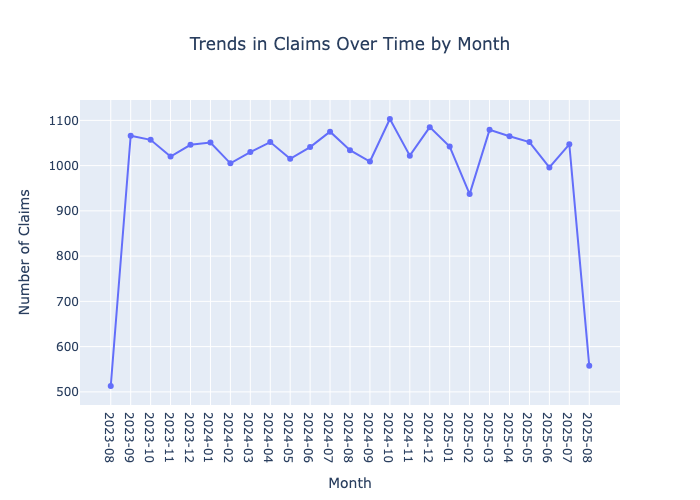

In [6]:
print_image(response)

## Question 2: "What's the average out-of-pocket cost for members in the Essential plan?"

In [7]:
question = "What's the average out-of-pocket cost for members in the Essential plan?"
response = ask_claims_mini_assistant(question)



> Entering new SQL Agent Executor chain...


/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_descriptions'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'procedure_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init


Invoking: `sql_db_list_tables` with `{'tool_input': ''}`
responded: I need to see what data is available to me, so I'll start by listing the tables in the database. From there, I'll examine the schema of any tables that seem relevant to the user's question.

mart_dim_diagnosis, mart_dim_patients, mart_dim_plans, mart_dim_procedures, mart_dim_providers, mart_fct_claim_diagnosis, mart_fct_claim_procedure, mart_fct_claim_providers, mart_fct_claims, raw_data_claim_providers, raw_data_claims, raw_data_patients, raw_data_providers, stg_claim_providers, stg_claims, stg_patients, stg_providers
Invoking: `get_schema_info` with `What's the average out-of-pocket cost for members in the Essential plan?`
responded: I need to understand the database schema to answer the user's question about the average out-of-pocket cost for the Essential plan. I'll use `get_schema_info` to get the necessary information and then build the right SQL query.

DuckDB Healthcare Claims Database Schema:

DuckDB Database

### Answer

In [8]:
if response.get("error_info") is not None and response.get("error_info") != "":
    print(f"Error: {response['error_info']}")
else:
    print(f"Response: {response['natural_language_response']}")


Response: The average out-of-pocket cost for members in the Essential plan is $1998.53.


### SQL Query

In [9]:
print(response["sql_query"])

SELECT avg(T1.patient_responsibility) FROM mart_fct_claims AS T1 INNER JOIN mart_dim_patients AS T2 ON T1.patient_id = T2.patient_id INNER JOIN mart_dim_plans AS T3 ON T2.plan_code = T3.plan_code WHERE T3.plan_name = 'Essential'


### Visualization

In [10]:
print_image(response)

No image available in the response.


## Question 3: "Which providers have the highest claim denial rates?"

In [11]:
question = "Which providers have the highest claim denial rates?"
response = ask_claims_mini_assistant(question)



> Entering new SQL Agent Executor chain...


/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_descriptions'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'procedure_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init


Invoking: `sql_db_list_tables` with `{'tool_input': ''}`
responded: I need to see what tables are in the database so I can find the right one to query. Then I'll check the schema of that table.

mart_dim_diagnosis, mart_dim_patients, mart_dim_plans, mart_dim_procedures, mart_dim_providers, mart_fct_claim_diagnosis, mart_fct_claim_procedure, mart_fct_claim_providers, mart_fct_claims, raw_data_claim_providers, raw_data_claims, raw_data_patients, raw_data_providers, stg_claim_providers, stg_claims, stg_patients, stg_providers
Invoking: `get_schema_info` with `mart_fct_claims, mart_dim_providers`
responded: I will start by using the `get_schema_info` tool to understand the database schema, focusing on the `mart_fct_claims` and `mart_dim_providers` tables to answer the question about provider claim denial rates.

DuckDB Healthcare Claims Database Schema:

DuckDB Database Schema - Healthcare Claims Data
Database: db | Schema: main

TABLES OVERVIEW:
Total mart tables: 9

• mart_dim_diagnosis

### Answer

In [12]:
if response.get("error_info") is not None and response.get("error_info") != "":
    print(f"Error: {response['error_info']}")
else:
    print(f"Response: {response['natural_language_response']}")


Response: The providers with the highest claim denial rates are Dr. Victoria Cano Alarcón (18.5%), Cisneros S.C. - Nueva Albania (17.9%), and Mesa, Ulibarri y Zarate - Zapopan (17.2%). I can create a visualization of this data if you'd like.


### SQL Query

In [13]:
print(response["sql_query"])


WITH ProviderDenialRates AS (
    SELECT
        p.provider_name,
        COUNT(c.claim_id) AS total_claims,
        SUM(CASE WHEN c.claim_status = 'DENIED' THEN 1 ELSE 0 END) AS denied_claims
    FROM
        mart_dim_providers p
    JOIN
        mart_fct_claim_providers cp ON p.provider_id = cp.provider_id
    JOIN
        mart_fct_claims c ON cp.claim_id = c.claim_id
    GROUP BY
        p.provider_name
)
SELECT
    provider_name,
    (CAST(denied_claims AS REAL) / total_claims) * 100 AS denial_rate
FROM
    ProviderDenialRates
WHERE
    total_claims > 0
ORDER BY
    denial_rate DESC
LIMIT 10;



### Visualization

In [14]:
print_image(response)

No image available in the response.


## Question 4: "Show me the trend of emergency room visits by month"

In [15]:
question = "Show me the trend of emergency room visits by month"
response = ask_claims_mini_assistant(question)



> Entering new SQL Agent Executor chain...


/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_descriptions'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'procedure_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init


Invoking: `sql_db_list_tables` with `{'tool_input': ''}`
responded: I need to see what tables are in the database so I can find the right one to query. Then I'll check the schema of the table that seems most relevant.

mart_dim_diagnosis, mart_dim_patients, mart_dim_plans, mart_dim_procedures, mart_dim_providers, mart_fct_claim_diagnosis, mart_fct_claim_procedure, mart_fct_claim_providers, mart_fct_claims, raw_data_claim_providers, raw_data_claims, raw_data_patients, raw_data_providers, stg_claim_providers, stg_claims, stg_patients, stg_providers
Invoking: `get_schema_info` with `mart_fct_claims`
responded: I should use the `get_schema_info` tool to understand the database structure before generating the SQL query. After that, I will construct the query to find the trend of emergency room visits by month. Finally, I will use the `generate_visualization` tool to create a visual representation of the trend.


DuckDB Healthcare Claims Database Schema:

DuckDB Database Schema - Healthcare

### Answer

In [16]:
if response.get("error_info") is not None and response.get("error_info") != "":
    print(f"Error: {response['error_info']}")
else:
    print(f"Response: {response['natural_language_response']}")


Response: Here is the trend of emergency room visits by month.


### SQL Query

In [17]:
print(response["sql_query"])


SELECT
  STRFTIME(service_date, '%Y-%m') AS month,
  COUNT(claim_id) AS number_of_visits
FROM stg_claims
WHERE
  place_of_service = 'Emergency Room'
GROUP BY
  month
ORDER BY
  month;



### Visualization

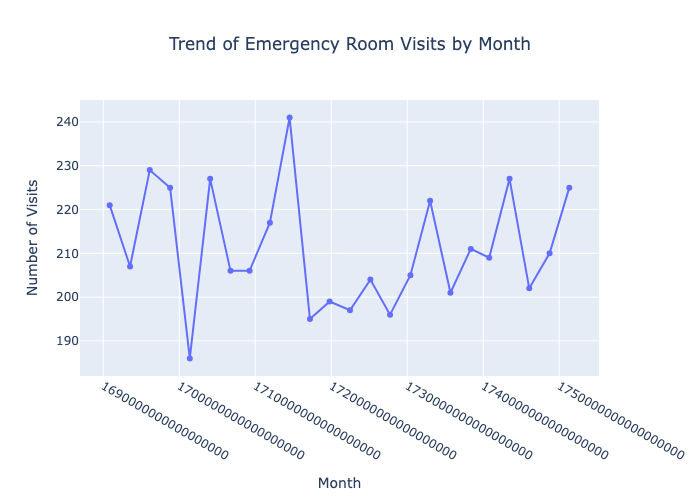

In [18]:
print_image(response)

## Question 5: "What percentage of claims are out-of-network by plan type?"

In [19]:
question = "What percentage of claims are out-of-network by plan type?"
response = ask_claims_mini_assistant(question)



> Entering new SQL Agent Executor chain...


/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_descriptions'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'procedure_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init


Invoking: `sql_db_list_tables` with `{'tool_input': ''}`
responded: I need to see what tables are available to determine which ones are relevant to the user's question. Then I'll examine the schema of those tables.

mart_dim_diagnosis, mart_dim_patients, mart_dim_plans, mart_dim_procedures, mart_dim_providers, mart_fct_claim_diagnosis, mart_fct_claim_procedure, mart_fct_claim_providers, mart_fct_claims, raw_data_claim_providers, raw_data_claims, raw_data_patients, raw_data_providers, stg_claim_providers, stg_claims, stg_patients, stg_providers
Invoking: `get_schema_info` with `What percentage of claims are out-of-network by plan type?`


DuckDB Healthcare Claims Database Schema:

DuckDB Database Schema - Healthcare Claims Data
Database: db | Schema: main

TABLES OVERVIEW:
Total mart tables: 9

• mart_dim_diagnosis (DIMENSION TABLE)
  - Columns: 1
  - Full name: "db"."main"."mart_dim_diagnosis"
  - Unique Keys: diagnosis_code

• mart_dim_plans (DIMENSION TABLE)
  - Columns: 2
  - Full 

### Answer

In [20]:
if response.get("error_info") is not None and response.get("error_info") != "":
    print(f"Error: {response['error_info']}")
else:
    print(f"Response: {response['natural_language_response']}")


Response: The percentage of out-of-network claims varies by plan type. The 'Elite' plan has the highest percentage of out-of-network claims at approximately 21.05%. The 'Premium' plan follows with 20.78%, 'Essential' with 20.71%, and 'Standard' with the lowest at 20.31%.


### SQL Query

In [21]:
print(response["sql_query"])

SELECT
    p.plan_name,
    (CAST(SUM(CASE WHEN pr.network_tier = 'Out of Network' THEN 1 ELSE 0 END) AS REAL) / COUNT(c.claim_id)) * 100 AS out_of_network_percentage
FROM mart_fct_claims AS c
JOIN mart_dim_patients AS pat ON c.patient_id = pat.patient_id
JOIN mart_dim_plans AS p ON pat.plan_code = p.plan_code
JOIN mart_fct_claim_providers AS cp ON c.claim_id = cp.claim_id
JOIN mart_dim_providers AS pr ON cp.provider_id = pr.provider_id
GROUP BY p.plan_name
ORDER BY out_of_network_percentage DESC
LIMIT 10;


### Visualization

In [22]:
print_image(response)

No image available in the response.


## Question 6: "Which diagnosis codes are driving the highest costs?"

In [23]:
question = "Which diagnosis codes are driving the highest costs?"
response = ask_claims_mini_assistant(question)



> Entering new SQL Agent Executor chain...


/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_descriptions'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'procedure_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init


Invoking: `sql_db_list_tables` with `{'tool_input': ''}`
responded: I need to see what tables are available to determine which ones are relevant to the user's question. Then I'll examine the schema of those tables to understand their structure and content. This will allow me to formulate the correct query.

mart_dim_diagnosis, mart_dim_patients, mart_dim_plans, mart_dim_procedures, mart_dim_providers, mart_fct_claim_diagnosis, mart_fct_claim_procedure, mart_fct_claim_providers, mart_fct_claims, raw_data_claim_providers, raw_data_claims, raw_data_patients, raw_data_providers, stg_claim_providers, stg_claims, stg_patients, stg_providers
Invoking: `get_schema_info` with `Which diagnosis codes are driving the highest costs?`
responded: I need to understand the database schema to answer the question about the highest-cost diagnosis codes. The most relevant tables appear to be `mart_dim_diagnosis`, `mart_fct_claims`, and `mart_fct_claim_diagnosis`. I will use `get_schema_info` to examine th

### Answer

In [24]:
if response.get("error_info") is not None and response.get("error_info") != "":
    print(f"Error: {response['error_info']}")
else:
    print(f"Response: {response['natural_language_response']}")


Response: The diagnosis codes driving the highest costs, based on the number of claims, are K92.1, E78.5, and F41.9, with 2142, 2129, and 2114 claims respectively. The top 10 codes also include N39.0, M79.3, I10, B34.2, A09, R06.02, and J06.9.


### SQL Query

In [25]:
print(response["sql_query"])

SELECT
  d.diagnosis_code,
  COUNT(c.claim_id) AS total_claims
FROM mart_fct_claim_diagnosis AS d
JOIN mart_fct_claims AS c
  ON d.claim_id = c.claim_id
GROUP BY
  d.diagnosis_code
ORDER BY
  total_claims DESC
LIMIT 10;


### Visualization

In [26]:
print_image(response)

No image available in the response.


## Question 7: "What is the plan distribution across different age groups?"

In [5]:
question = "What is the distribution of Low back pain were filed, by group age"
response = ask_claims_mini_assistant(question)

/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'diagnosis_descriptions'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init__.py:623: SAWarning: Did not recognize type 'list' of column 'procedure_codes'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/opt/homebrew/Caskroom/miniconda/base/envs/sofia_data_eng_challenge/lib/python3.13/site-packages/duckdb_engine/__init



> Entering new SQL Agent Executor chain...

Invoking: `sql_db_list_tables` with `{'tool_input': ''}`
responded: I need to see the tables in the database to figure out what to query. Then I'll check the schema of the most relevant tables.

mart_dim_diagnosis, mart_dim_patients, mart_dim_plans, mart_dim_procedures, mart_dim_providers, mart_fct_claim_diagnosis, mart_fct_claim_procedure, mart_fct_claim_providers, mart_fct_claims, raw_data_claim_providers, raw_data_claims, raw_data_patients, raw_data_providers, stg_claim_providers, stg_claims, stg_patients, stg_providers
Invoking: `get_schema_info` with `claims`
responded: Okay, the user wants to know the distribution of "Low back pain" claims by age group.

I will start by using the `get_schema_info` tool to understand the database schema. This will help me identify the relevant tables and columns for claims, diagnoses, and patient age.

Once I have the schema, I will construct a SQL query to:
1. Join the necessary tables (likely a claim

### Answer

In [6]:
if response.get("error_info") is not None and response.get("error_info") != "":
    print(f"Error: {response['error_info']}")
else:
    print(f"Response: {response['natural_language_response']}")


Response: The distribution of claims for 'Low back pain' is spread across different age groups. The number of claims is highest in the 61+ age group, with 8 claims, followed by the 46-60 age group with 6 claims. The 31-45 age group has 4 claims, and the 19-30 age group has the lowest number of claims with 2.


### SQL Query

In [15]:
print(response["sql_query"])


WITH patient_age AS (
    SELECT
        *,
        date_diff('year', date_of_birth, today()) AS age
    FROM raw_data_patients
),
age_groups AS (
    SELECT
        *,
        CASE
            WHEN age <= 18 THEN '0-18'
            WHEN age > 18 AND age <= 35 THEN '19-35'
            WHEN age > 35 AND age <= 50 THEN '36-50'
            WHEN age > 50 AND age <= 65 THEN '51-65'
            ELSE '66+'
        END AS age_group
    FROM patient_age
)
SELECT
    ag.age_group,
    p.plan_name,
    COUNT(ag.patient_id) AS patient_count
FROM age_groups ag
JOIN mart_dim_plans p ON ag.plan_code = p.plan_code
GROUP BY
    ag.age_group,
    p.plan_name
ORDER BY
    ag.age_group,
    p.plan_name;



### Visualization

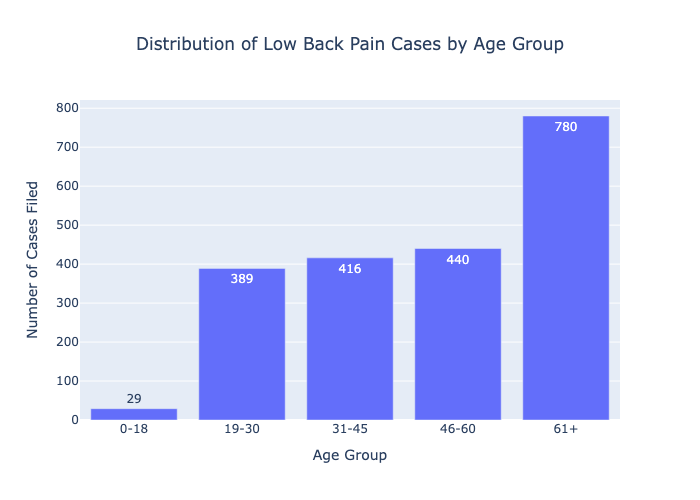

In [7]:
print_image(response)